<a name="1"></a>
## 1 - Packages

First, let's run the cell below to import all the packages that you will need during this assignment.

- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for amchine learning.


In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from autils import *
%matplotlib inline

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

Tensorflow and Keras 
Tensofrflow is a machine learning package developed by Google. IN 2019

In [9]:
# load dataset
X, y = load_data()

In [10]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (1000, 400)
The shape of y is: (1000, 1)


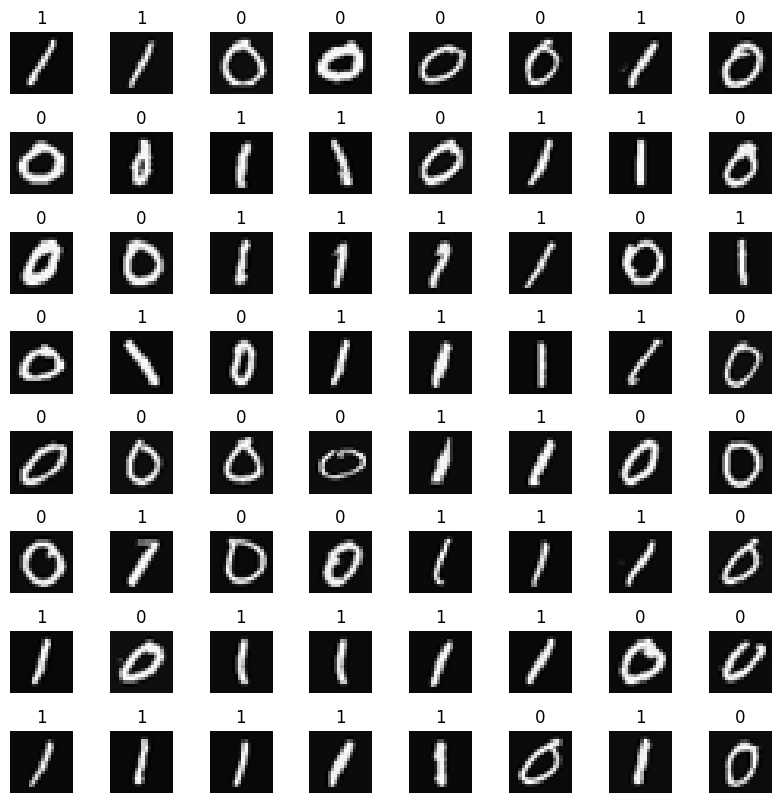

In [31]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    # ax.imshow(X_random_reshaped)
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()

In [16]:
# UNQ_C1
# GRADED CELL: Sequential model

model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    #specify input size
        ### START CODE HERE ### 
        Dense(25,activation = 'sigmoid', name = 'layer1'),
        Dense(15,activation = 'sigmoid', name = 'layer2'),
        Dense(1,activation = 'sigmoid', name = 'layer3')
        
        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)                            


In [17]:

model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                10025     
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 1)                 16        
                                                                 
Total params: 10431 (40.75 KB)
Trainable params: 10431 (40.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# UNIT TESTS
from public_tests import *

test_c1(model)

All tests passed!


In [19]:
L1_num_params = 400 * 25 + 25 # W1 parameters + b1 parameters
L2_num_params = 25 * 15 + 15 # W2 parameters + b2 parameters
L3_num_params = 15 * 1 + 1 # W3 parameters + b3 parameters
print("L1 params = ", L1_num_params)
print("L2 params = ", L2_num_params)
print("L3 params = ", L3_num_params)


L1 params =  10025
L2 params =  390
L3 params =  16


In [20]:
[layer1, layer2, layer3] = model.layers

In [34]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()

In [35]:
print (f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print (f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print (f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)
